The purpose of this notebook is to define drifter deployment regions that will be used in our OPP analysis/reporting.

4 regions are defined:
1. Gulf of St. Lawrence
2. Bay of Fundy
3. Scotian Shelf
4. Newfoundland Shelf

In [1]:
import os
import datetime
import json
import glob
import yaml


import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.pylab import cm as cmlab
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from shapely.geometry import Point, Polygon
import xarray as xr


from driftutils import utils
from driftutils.assemble_drifter_metadata import assemble_drifter_metadata
from plotutils import plotting_utils as putils

%matplotlib inline

In [2]:
data_dir = '/home/jmm000/work/Drifters/output/TechReport2023/netcdf/'
etopo_file = '/home/sdfo000/sitestore7/opp_drift_fa3/software/misc_files/ETOPO1_Bed_g_gmt4.grd'

lon_min, lat_min, lon_max, lat_max = -72, 40, -40, 54

In [3]:
assemble_drifter_metadata(data_dir, 'all_drifters.json')

In [4]:
with open('all_drifters.json', 'r') as f:
    metadata = json.load(f)

Below, I define the coordinates of the desired regions. To do this, I used the following tool: https://www.keene.edu/campus/maps/tool

This tool allows one to draw a polygon on a map and it displays the coordinates of that polygon. The coordinates of the poylgon are defined as (lon, lat).

I used it to define the 4 regions in the cell below.

In [5]:
regions = {'Bay of Fundy': Polygon([(-68, 44.6), (-66, 44), (-63.4, 45.3), (-64.5, 46.1)]),
           'Newfoundland Shelf': Polygon([
      [
        -56.0742188,
        51.3168805
      ],
      [
        -58.7109375,
        47.8426576
      ],
      [
        -55.9863281,
        47.8574029
      ],
      [
        -56.0083008,
        46.8752134
      ],
      [
        -56.0083008,
        44.8558688
      ],
      [
        -55.3710938,
        45.0269505
      ],
      [
        -55.0854492,
        44.8402907
      ],
      [
        -53.0859375,
        43.8503745
      ],
      [
        -49.7900391,
        42.5045029
      ],
      [
        -48.7133789,
        43.9770047
      ],
      [
        -47.6147461,
        45.2748864
      ],
      [
        -46.7578125,
        46.0884718
      ],
      [
        -42.8686523,
        46.6343507
      ],
      [
        -42.8027344,
        49.2391208
      ],
      [
        -44.8901367,
        50.7920471
      ],
      [
        -46.9995117,
        52.1874047
      ],
      [
        -55.7226563,
        52.1874047
      ],
      [
        -56.0742188,
        51.3168805
      ]
    ]),
           'Gulf of St. Lawrence': Polygon([
      [
        -68.90625,
        47.754098
      ],
      [
        -69.9389648,
        47.3983492
      ],
      [
        -70.4443359,
        47.6209754
      ],
      [
        -69.2358398,
        48.7634311
      ],
      [
        -67.6757813,
        49.5537255
      ],
      [
        -66.7529297,
        50.2050333
      ],
      [
        -65.7861328,
        50.4295179
      ],
      [
        -59.9414063,
        50.3454604
      ],
      [
        -58.5791016,
        51.179343
      ],
      [
        -55.8105469,
        52.1874047
      ],
      [
        -56.0742188,
        51.3168805
      ],
      [
        -58.7109375,
        47.8426576
      ],
#      [
#        -58.6669922,
#        48.1367667
#      ],
      [
        -59.1503906,
        47.6653874
      ],
      [
        -60.5126953,
        46.8000594
      ],
      [
        -61.4135742,
        45.5986657
      ],
      [
        -63.4350586,
        45.7215215
      ],
      [
        -64.621582,
        46.0579852
      ],
      [
        -68.90625,
        47.754098
      ]
    ]),
    'Scotian Shelf': Polygon([
      [
        -60.5126953,
        46.8000594
      ],
      [
        -61.3366699,
        45.683158
      ],
      [
        -61.7541504,
        45.1355552
      ],
      [
        -63.9294434,
        44.7233202
      ],
      [
        -66,
        44
      ],
      [
        -65.7312012,
        42.0329743
      ],
      [
        -63.9953613,
        42.6501218
      ],
      [
        -62.1606445,
        42.8840147
      ],
      [
        -59.4689941,
        43.5405848
      ],
      [
        -57.5244141,
        44.2766713
      ],
      [
        -57.3156738,
        44.3866915
      ],
      [
        -57.4584961,
        44.5669909
      ],
      [
        -57.7880859,
        44.902578
      ],
      [
        -58.4912109,
        45.4292987
      ],
      [
        -59.2712402,
        45.9969616
      ],
      [
        -59.7106934,
        46.362093
      ],
      [
        -60.3808594,
        46.8677027
      ],
      [
        -60.5126953,
        46.8000594
      ]
    ]
        ),
          'Laurentian Channel': Polygon([
      [
        -60.3808594,
        46.8677027
      ],
      [
        -59.7106934,
        46.362093
      ],
      [
        -59.2712402,
        45.9969616
      ],
      [
        -58.4912109,
        45.4292987
      ],
      [
        -57.7880859,
        44.902578
      ],
      [
        -57.4584961,
        44.5669909
      ],
      [
        -57.3156738,
        44.3866915
      ],
      [
        -56.0083008,
        44.8558688
      ],
      [
        -56.0083008,
        46.8752134
      ],
      [
        -55.9863281,
        47.8574029
      ],
      [
        -58.7109375,
        47.8426576
      ],
      [
        -58.9416504,
        47.8500308
      ],
      [
        -59.1503906,
        47.6653874
      ],
      [
        -60.3808594,
        46.8752134
      ],
      [
        -60.3808594,
        46.8677027
      ]
    ])}

Because the drift tool expects polygons in (latitude, longitude), I will invert the coordinates in the cell below:

In [6]:
for region in regions:
    poly = regions[region]
    xx, yy = poly.exterior.coords.xy
    poly2 = Polygon([(y,x) for x, y in zip(xx,yy)])
    regions[region] = poly2

Now I will save the coordinates to a yaml file

In [7]:
yaml_dict = {'polygon_coords': {}}
for region in regions:
    yaml_dict['polygon_coords'][region] = []
    xx, yy = regions[region].exterior.coords.xy
    for lat, lon in zip(xx, yy):
        yaml_dict['polygon_coords'][region].append([lat, lon])
print(yaml_dict)
with open('drifter-regions.yaml', 'w') as f:
    yaml.dump(yaml_dict, f)

{'polygon_coords': {'Bay of Fundy': [[44.6, -68.0], [44.0, -66.0], [45.3, -63.4], [46.1, -64.5], [44.6, -68.0]], 'Newfoundland Shelf': [[51.3168805, -56.0742188], [47.8426576, -58.7109375], [47.8574029, -55.9863281], [46.8752134, -56.0083008], [44.8558688, -56.0083008], [45.0269505, -55.3710938], [44.8402907, -55.0854492], [43.8503745, -53.0859375], [42.5045029, -49.7900391], [43.9770047, -48.7133789], [45.2748864, -47.6147461], [46.0884718, -46.7578125], [46.6343507, -42.8686523], [49.2391208, -42.8027344], [50.7920471, -44.8901367], [52.1874047, -46.9995117], [52.1874047, -55.7226563], [51.3168805, -56.0742188]], 'Gulf of St. Lawrence': [[47.754098, -68.90625], [47.3983492, -69.9389648], [47.6209754, -70.4443359], [48.7634311, -69.2358398], [49.5537255, -67.6757813], [50.2050333, -66.7529297], [50.4295179, -65.7861328], [50.3454604, -59.9414063], [51.179343, -58.5791016], [52.1874047, -55.8105469], [51.3168805, -56.0742188], [47.8426576, -58.7109375], [47.6653874, -59.1503906], [46.8

## Now explore plotting the regions

In [8]:
with open('drifter-regions.yaml', 'r') as f:
    poly_coords = yaml.safe_load(f)
regions = {}
for region in poly_coords['polygon_coords']:
    coords = poly_coords['polygon_coords'][region]
    new_coords = [(lon, lat) for lat, lon in coords ]
    regions[region] = Polygon(new_coords)

In [9]:
regions

{'Bay of Fundy': <shapely.geometry.polygon.Polygon at 0x7f65b5f7b580>,
 'Gulf of St. Lawrence': <shapely.geometry.polygon.Polygon at 0x7f65b5f7b1f0>,
 'Laurentian Channel': <shapely.geometry.polygon.Polygon at 0x7f65b5fa0c40>,
 'Newfoundland Shelf': <shapely.geometry.polygon.Polygon at 0x7f65b5fa05b0>,
 'Scotian Shelf': <shapely.geometry.polygon.Polygon at 0x7f65b5fa0190>}

Below is the drift tool bathymetry plotter function - I've copied and pasted because I wanted to modify the the plotting contour levels which isn't possible in the current version of the function.

In [10]:
def plot_bathymetry(
    ax,
    bbox,
    plot_parameters=None,
    bathymetry_file=None,
    dataproj=ccrs.PlateCarree(),
    add_contourf=True,
    colorbar_visible=False,
    add_contours=False,
    fig=None
):
    """Plot topography/bathymetry on the given axes.

    Parameters
    ----------
    ax : Axes
        Axes on which to plot the bathymetry contours.
    bbox : LatLonBoundingBox
        Bounding box for plot in terms of lat/lon.
    plot_parameters : dict
        dictionary containing parameters to use when creating and saving plots.
        Includes values such as 'dpi', 'fontsize', etc.
    bathymetry_file : str
        Name of netCDF containing bathymetry data.
    dataproj : cartopy.crs.Projection
        Cartopy projection to use for transforming the data when plotting.
    add_contourf : boolean
        boolean value defining whether the contourf version
        of the bathymetry will be plotted. True by default
    colorbar_visible : boolean
        boolean value defining whether or not to add a
        colorbar for the bathymetry values.
    add_contours : boolean
        boolean value definitely whether the contour lines
        will be plotted. This is False by default.
    fig : figure
        current Matplotlib figure
    """

    if not bathymetry_file:
        return

    if isinstance(bbox, list):
        bbox = putils.LatLonBoundingBox(lon_min=bbox[0], lat_min=bbox[2],
                                        lon_max=bbox[1], lat_max=bbox[3])

    # Read in topography/bathymetry. An example of a useful dataset is:
    # http://www.ngdc.noaa.gov/mgg/global/relief/ETOPO1/data/ice_surface \
    #    /grid_registered/netcdf/ETOPO1_Ice_g_gmt4.grd.gz
    etopo = xr.open_dataset(bathymetry_file)
    lons = etopo['x'].values[:]
    lats = etopo['y'].values[:]

    res = utils.find_subset_indices(
        bbox.lat_min - 5,
        bbox.lat_max + 5,
        bbox.lon_min - 20,
        bbox.lon_max + 10,
        lats, lons
    )

    lon, lat = np.meshgrid(lons[res.lon_min: res.lon_max],
                           lats[res.lat_min: res.lat_max])
    etopo_reduced = etopo['z'][res.lat_min: res.lat_max,
                               res.lon_min: res.lon_max]

    bathy = etopo_reduced.where(etopo_reduced <= 0)

    # This part adds the colored bathymetry
    if add_contourf:
        levels = [-6000, -5000, -4000, -3000, -2000, -1500, -1000, -500, -400, -300, -250,
                  -200, -150, -100, -75, -65, -50, -35, -25, -15]
        contour_set = ax.contourf(
            lon, lat,
            bathy, levels,
            cmap=putils.LevelColormap(levels, cmap=cmlab.Blues_r),
            transform=dataproj,
            extend='neither',
            alpha=1.0,
            origin='lower',
            zorder=0
        )
        contour_set.axis = 'tight'

        # optionally add the colorbar
        if colorbar_visible:
            divider = make_axes_locatable(ax)
            cbar_ax = divider.new_horizontal(
                            size="5%",
                            pad=0.1,
                            axes_class=plt.Axes
                            )
            fig.add_axes(cbar_ax)
            colorbar = plt.colorbar(contour_set, cax=cbar_ax)

            if plot_parameters:
                colorbar_label_fontsize = plot_parameters[
                                                'colorbar_label_fontsize'
                                            ]
                colorbar_ticklabel_fontsize = plot_parameters[
                                                'colorbar_ticklabel_fontsize'
                                            ]
            else:
                colorbar_label_fontsize = 11
                colorbar_ticklabel_fontsize = 9

            colorbar.set_label(
                'Depth (m)',
                fontsize=colorbar_label_fontsize
                )
            for t in colorbar.ax.get_yticklabels():
                t.set_fontsize(colorbar_ticklabel_fontsize)

    # This part just adds the contour lines
    if add_contours:
        ax.contour(
            lon, lat, bathy,
            levels=[-500, -250, -200, -150, -100, -75],
            transform=dataproj,
            extend='neither',
            linewidths=0.1,
            linestyles='solid',
            colors='k',
            zorder=1
        )



In [11]:
def plot_launch_coords(metadata, ax, color='C0'):
    for d in metadata['drifters']:
        launch_lat = float(d['first_latitude_observation'])
        launch_lon = float(d['first_longitude_observation'])
        ax.plot(launch_lon, launch_lat, 'o', color=color,
                transform=ccrs.PlateCarree(), ms=4,
                markeredgecolor='k',
                markeredgewidth=0.3, label='__nolabel')

In [12]:
def plot_polygon(poly, ax, color='r', label='_nolabel'):
    print(label)
    kwargs = {'facecolor': color, 
              'edgecolor': 'k',
              'alpha': 0.5,
              'label': label}
    ax.add_geometries(
        [poly], 
        crs=ccrs.PlateCarree(),
        **kwargs)
    handle= Patch(**kwargs)
    return handle

Bay of Fundy
Gulf of St. Lawrence
Laurentian Channel
Newfoundland Shelf
Scotian Shelf


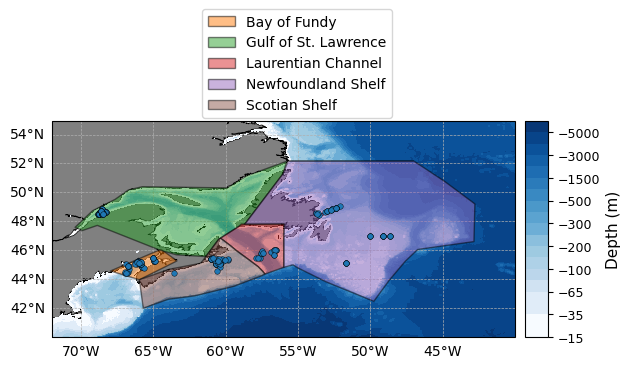

In [13]:
region_colors = {region: f'C{i+1}' for i, region in enumerate(regions)}

handles = []
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
plot_launch_coords(metadata, ax)
for region in regions:
    handle = plot_polygon(regions[region], ax, color=region_colors[region], label=region)
    handles.append(handle)
# Plot bathymetry
plot_bathymetry(ax, [lon_min, lon_max, lat_min, lat_max],
                colorbar_visible=True, bathymetry_file=etopo_file,
               fig=fig)

# Add legend
ax.legend(handles=handles, bbox_to_anchor=(0.75, 1.55))
# Adjust plot
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.5,facecolor='gray')
ax.gridlines(draw_labels=["bottom", "left"], zorder=0,linewidth=0.5, linestyle='--')

In [14]:
fig.savefig('DeploymentRegions.png', dpi=500, bbox_inches='tight')